In [ ]:
#implement callbacks including early stopping and/or not introduce k folds (probs both)

In [1]:
import numpy as np
import pandas as pd
import os
import datetime as dt

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline
from sklearn import model_selection
from sklearn.model_selection import GridSearchCV,cross_val_score,train_test_split, KFold
from sklearn.metrics import mean_squared_error


import tensorflow.keras as keras


In [2]:
df = pd.read_csv(os.path.join("data", "final_df_big.csv"))

In [3]:
df_no_date = df.drop(columns=['Date'])

x_arr = np.array(df_no_date.drop(columns=['Turbidity (NTU)']), np.float32)
x_shaped = x_arr.reshape(x_arr.shape[0], 1, x_arr.shape[1])

y_shaped = df_no_date['Turbidity (NTU)'].values

kf = KFold(n_splits=5, shuffle=True)
kf.get_n_splits(x_shaped)

print(kf)


KFold(n_splits=5, random_state=None, shuffle=True)


In [4]:
model = keras.models.Sequential([
    keras.layers.GRU(100, return_sequences=True, input_shape=[None, x_shaped.shape[2]]),
    keras.layers.GRU(144, return_sequences=True, activation='relu'),
    keras.layers.Reshape(target_shape=(12,12)),
    keras.layers.Conv1D(filters=128, kernel_size=4, strides=1, padding='same',activation='relu'),
    keras.layers.Conv1D(filters=64, kernel_size=4, padding='same', activation='relu'),
    keras.layers.MaxPooling1D((2), strides=None),
    keras.layers.AveragePooling1D(2),
    keras.layers.Flatten(),
    keras.layers.Dense(8, ),
    keras.layers.Dense(1)
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru (GRU)                   (None, None, 100)         33000     
                                                                 
 gru_1 (GRU)                 (None, None, 144)         106272    
                                                                 
 reshape (Reshape)           (None, 12, 12)            0         
                                                                 
 conv1d (Conv1D)             (None, 12, 128)           6272      
                                                                 
 conv1d_1 (Conv1D)           (None, 12, 64)            32832     
                                                                 
 max_pooling1d (MaxPooling1D  (None, 6, 64)            0         
 )                                                               
                                                        

In [5]:
model.compile(optimizer=keras.optimizers.RMSprop(learning_rate=0.00010),  
              loss='mse',
              metrics=[keras.metrics.RootMeanSquaredError()]
        )

In [6]:
models = []
histories = []  
model_evals = []
for train_index, test_index in kf.split(x_shaped):
    x_train, x_test = x_shaped[train_index], x_shaped[test_index]
    y_train, y_test = y_shaped[train_index], y_shaped[test_index]
    
    history = model.fit(x_train,y_train,epochs=200)
    
    model_eval = model.evaluate(x_test, y_test)
    models.append(model)
    histories.append(history)
    model_evals.append(model_eval)
        

Epoch 1/200
1069/1069 [==============================] - 7s 4ms/step - loss: 1934.7632 - root_mean_squared_error: 43.9859
Epoch 2/200
1069/1069 [==============================] - 4s 4ms/step - loss: 693.6553 - root_mean_squared_error: 26.3373
Epoch 3/200
1069/1069 [==============================] - 4s 4ms/step - loss: 611.1188 - root_mean_squared_error: 24.7208
Epoch 4/200
1069/1069 [==============================] - 4s 4ms/step - loss: 547.5426 - root_mean_squared_error: 23.3996
Epoch 5/200
1069/1069 [==============================] - 4s 4ms/step - loss: 494.5332 - root_mean_squared_error: 22.2381
Epoch 6/200
1069/1069 [==============================] - 5s 4ms/step - loss: 453.5702 - root_mean_squared_error: 21.2972
Epoch 7/200
1069/1069 [==============================] - 5s 5ms/step - loss: 421.5551 - root_mean_squared_error: 20.5318
Epoch 8/200
1069/1069 [==============================] - 5s 5ms/step - loss: 399.5129 - root_mean_squared_error: 19.9878
Epoch 9/200
1069/1069 [========

1069/1069 [==============================] - 5s 5ms/step - loss: 172.6791 - root_mean_squared_error: 13.1407
Epoch 69/200
1069/1069 [==============================] - 5s 5ms/step - loss: 172.0128 - root_mean_squared_error: 13.1154
Epoch 70/200
1069/1069 [==============================] - 5s 5ms/step - loss: 171.3299 - root_mean_squared_error: 13.0893
Epoch 71/200
1069/1069 [==============================] - 5s 5ms/step - loss: 170.1914 - root_mean_squared_error: 13.0457
Epoch 72/200
1069/1069 [==============================] - 5s 5ms/step - loss: 168.8122 - root_mean_squared_error: 12.9928
Epoch 73/200
1069/1069 [==============================] - 5s 5ms/step - loss: 168.5342 - root_mean_squared_error: 12.9821
Epoch 74/200
1069/1069 [==============================] - 5s 5ms/step - loss: 168.2994 - root_mean_squared_error: 12.9730
Epoch 75/200
1069/1069 [==============================] - 5s 5ms/step - loss: 166.9348 - root_mean_squared_error: 12.9203
Epoch 76/200
1069/1069 [=============

Epoch 135/200
1069/1069 [==============================] - 5s 5ms/step - loss: 131.6036 - root_mean_squared_error: 11.4719
Epoch 136/200
1069/1069 [==============================] - 5s 5ms/step - loss: 131.7382 - root_mean_squared_error: 11.4777
Epoch 137/200
1069/1069 [==============================] - 5s 5ms/step - loss: 131.9401 - root_mean_squared_error: 11.4865
Epoch 138/200
1069/1069 [==============================] - 5s 5ms/step - loss: 130.5130 - root_mean_squared_error: 11.4242
Epoch 139/200
1069/1069 [==============================] - 5s 5ms/step - loss: 131.0691 - root_mean_squared_error: 11.4485
Epoch 140/200
1069/1069 [==============================] - 5s 5ms/step - loss: 129.7758 - root_mean_squared_error: 11.3919
Epoch 141/200
1069/1069 [==============================] - 5s 5ms/step - loss: 129.0450 - root_mean_squared_error: 11.3598
Epoch 142/200
1069/1069 [==============================] - 5s 5ms/step - loss: 129.4485 - root_mean_squared_error: 11.3775
Epoch 143/200
10

268/268 [==============================] - 1s 2ms/step - loss: 85.8704 - root_mean_squared_error: 9.2666
Epoch 1/200
1069/1069 [==============================] - 5s 5ms/step - loss: 110.3702 - root_mean_squared_error: 10.5057
Epoch 2/200
1069/1069 [==============================] - 5s 5ms/step - loss: 108.2391 - root_mean_squared_error: 10.4038
Epoch 3/200
1069/1069 [==============================] - 5s 5ms/step - loss: 108.8471 - root_mean_squared_error: 10.4330
Epoch 4/200
1069/1069 [==============================] - 5s 5ms/step - loss: 109.0487 - root_mean_squared_error: 10.4426
Epoch 5/200
1069/1069 [==============================] - 5s 5ms/step - loss: 107.7203 - root_mean_squared_error: 10.3788
Epoch 6/200
1069/1069 [==============================] - 5s 5ms/step - loss: 106.5932 - root_mean_squared_error: 10.3244
Epoch 7/200
1069/1069 [==============================] - 5s 5ms/step - loss: 107.5886 - root_mean_squared_error: 10.3725
Epoch 8/200
1069/1069 [=========================

1069/1069 [==============================] - 5s 5ms/step - loss: 88.6131 - root_mean_squared_error: 9.4135
Epoch 69/200
1069/1069 [==============================] - 5s 5ms/step - loss: 89.0478 - root_mean_squared_error: 9.4365
Epoch 70/200
1069/1069 [==============================] - 5s 5ms/step - loss: 89.3959 - root_mean_squared_error: 9.4549
Epoch 71/200
1069/1069 [==============================] - 5s 5ms/step - loss: 88.8888 - root_mean_squared_error: 9.4281
Epoch 72/200
1069/1069 [==============================] - 6s 5ms/step - loss: 88.5219 - root_mean_squared_error: 9.4086
Epoch 73/200
1069/1069 [==============================] - 5s 5ms/step - loss: 87.9887 - root_mean_squared_error: 9.3802
Epoch 74/200
1069/1069 [==============================] - 5s 5ms/step - loss: 88.2224 - root_mean_squared_error: 9.3927
Epoch 75/200
1069/1069 [==============================] - 5s 5ms/step - loss: 87.5368 - root_mean_squared_error: 9.3561
Epoch 76/200
1069/1069 [=============================

1069/1069 [==============================] - 6s 5ms/step - loss: 76.7555 - root_mean_squared_error: 8.7610
Epoch 137/200
1069/1069 [==============================] - 5s 5ms/step - loss: 76.1856 - root_mean_squared_error: 8.7284
Epoch 138/200
1069/1069 [==============================] - 6s 5ms/step - loss: 76.7616 - root_mean_squared_error: 8.7614
Epoch 139/200
1069/1069 [==============================] - 6s 5ms/step - loss: 75.9915 - root_mean_squared_error: 8.7173
Epoch 140/200
1069/1069 [==============================] - 6s 5ms/step - loss: 76.5664 - root_mean_squared_error: 8.7502
Epoch 141/200
1069/1069 [==============================] - 6s 6ms/step - loss: 76.5835 - root_mean_squared_error: 8.7512
Epoch 142/200
1069/1069 [==============================] - 6s 6ms/step - loss: 76.3524 - root_mean_squared_error: 8.7380
Epoch 143/200
1069/1069 [==============================] - 5s 5ms/step - loss: 75.7189 - root_mean_squared_error: 8.7017
Epoch 144/200
1069/1069 [=====================

Epoch 3/200
1069/1069 [==============================] - 6s 6ms/step - loss: 29.4184 - root_mean_squared_error: 5.4239
Epoch 4/200
1069/1069 [==============================] - 6s 6ms/step - loss: 28.8913 - root_mean_squared_error: 5.3751
Epoch 5/200
1069/1069 [==============================] - 6s 6ms/step - loss: 28.4672 - root_mean_squared_error: 5.3355
Epoch 6/200
1069/1069 [==============================] - 6s 6ms/step - loss: 28.5193 - root_mean_squared_error: 5.3403
Epoch 7/200
1069/1069 [==============================] - 6s 6ms/step - loss: 28.3006 - root_mean_squared_error: 5.3198
Epoch 8/200
1069/1069 [==============================] - 6s 6ms/step - loss: 28.1171 - root_mean_squared_error: 5.3026
Epoch 9/200
1069/1069 [==============================] - 6s 6ms/step - loss: 27.8256 - root_mean_squared_error: 5.2750
Epoch 10/200
1069/1069 [==============================] - 6s 6ms/step - loss: 27.6775 - root_mean_squared_error: 5.2609
Epoch 11/200
1069/1069 [=======================

1069/1069 [==============================] - 7s 6ms/step - loss: 21.5761 - root_mean_squared_error: 4.6450
Epoch 72/200
1069/1069 [==============================] - 7s 6ms/step - loss: 21.4313 - root_mean_squared_error: 4.6294
Epoch 73/200
1069/1069 [==============================] - 7s 6ms/step - loss: 21.4398 - root_mean_squared_error: 4.6303
Epoch 74/200
1069/1069 [==============================] - 7s 6ms/step - loss: 21.5617 - root_mean_squared_error: 4.6435
Epoch 75/200
1069/1069 [==============================] - 7s 6ms/step - loss: 21.1815 - root_mean_squared_error: 4.6023
Epoch 76/200
1069/1069 [==============================] - 7s 6ms/step - loss: 21.4929 - root_mean_squared_error: 4.6360
Epoch 77/200
1069/1069 [==============================] - 7s 6ms/step - loss: 21.2592 - root_mean_squared_error: 4.6108
Epoch 78/200
1069/1069 [==============================] - 7s 6ms/step - loss: 21.8745 - root_mean_squared_error: 4.6770
Epoch 79/200
1069/1069 [=============================

1069/1069 [==============================] - 8s 8ms/step - loss: 17.3755 - root_mean_squared_error: 4.1684
Epoch 140/200
1069/1069 [==============================] - 9s 8ms/step - loss: 17.4272 - root_mean_squared_error: 4.1746
Epoch 141/200
1069/1069 [==============================] - 11s 10ms/step - loss: 17.1644 - root_mean_squared_error: 4.1430
Epoch 142/200
1069/1069 [==============================] - 7s 6ms/step - loss: 17.7422 - root_mean_squared_error: 4.2121
Epoch 143/200
1069/1069 [==============================] - 7s 6ms/step - loss: 17.2097 - root_mean_squared_error: 4.1485
Epoch 144/200
1069/1069 [==============================] - 7s 7ms/step - loss: 16.6008 - root_mean_squared_error: 4.0744
Epoch 145/200
1069/1069 [==============================] - 7s 6ms/step - loss: 17.2609 - root_mean_squared_error: 4.1546
Epoch 146/200
1069/1069 [==============================] - 7s 6ms/step - loss: 17.3597 - root_mean_squared_error: 4.1665
Epoch 147/200
1069/1069 [===================

1069/1069 [==============================] - 7s 7ms/step - loss: 58.5693 - root_mean_squared_error: 7.6531
Epoch 7/200
1069/1069 [==============================] - 7s 7ms/step - loss: 57.3766 - root_mean_squared_error: 7.5747
Epoch 8/200
1069/1069 [==============================] - 7s 7ms/step - loss: 57.7004 - root_mean_squared_error: 7.5961
Epoch 9/200
1069/1069 [==============================] - 7s 7ms/step - loss: 57.9289 - root_mean_squared_error: 7.6111
Epoch 10/200
1069/1069 [==============================] - 7s 6ms/step - loss: 58.3737 - root_mean_squared_error: 7.6403
Epoch 11/200
1069/1069 [==============================] - 7s 6ms/step - loss: 57.8508 - root_mean_squared_error: 7.6060
Epoch 12/200
1069/1069 [==============================] - 7s 7ms/step - loss: 57.9808 - root_mean_squared_error: 7.6145
Epoch 13/200
1069/1069 [==============================] - 7s 7ms/step - loss: 57.2747 - root_mean_squared_error: 7.5680
Epoch 14/200
1069/1069 [==============================] 

1069/1069 [==============================] - 7s 7ms/step - loss: 54.6605 - root_mean_squared_error: 7.3933
Epoch 75/200
1069/1069 [==============================] - 8s 7ms/step - loss: 54.5020 - root_mean_squared_error: 7.3825
Epoch 76/200
1069/1069 [==============================] - 8s 7ms/step - loss: 53.8025 - root_mean_squared_error: 7.3350
Epoch 77/200
1069/1069 [==============================] - 8s 7ms/step - loss: 54.1271 - root_mean_squared_error: 7.3571
Epoch 78/200
1069/1069 [==============================] - 8s 7ms/step - loss: 55.0310 - root_mean_squared_error: 7.4183
Epoch 79/200
1069/1069 [==============================] - 8s 7ms/step - loss: 54.0015 - root_mean_squared_error: 7.3486
Epoch 80/200
1069/1069 [==============================] - 8s 7ms/step - loss: 54.5623 - root_mean_squared_error: 7.3866
Epoch 81/200
1069/1069 [==============================] - 8s 7ms/step - loss: 54.5236 - root_mean_squared_error: 7.3840
Epoch 82/200
1069/1069 [=============================

1069/1069 [==============================] - 8s 7ms/step - loss: 51.7053 - root_mean_squared_error: 7.1906
Epoch 143/200
1069/1069 [==============================] - 8s 7ms/step - loss: 52.0067 - root_mean_squared_error: 7.2116
Epoch 144/200
1069/1069 [==============================] - 8s 8ms/step - loss: 51.8229 - root_mean_squared_error: 7.1988
Epoch 145/200
1069/1069 [==============================] - 8s 8ms/step - loss: 52.4541 - root_mean_squared_error: 7.2425
Epoch 146/200
1069/1069 [==============================] - 8s 7ms/step - loss: 52.0230 - root_mean_squared_error: 7.2127
Epoch 147/200
1069/1069 [==============================] - 8s 7ms/step - loss: 52.4360 - root_mean_squared_error: 7.2413
Epoch 148/200
1069/1069 [==============================] - 8s 7ms/step - loss: 51.8131 - root_mean_squared_error: 7.1981
Epoch 149/200
1069/1069 [==============================] - 8s 8ms/step - loss: 51.6018 - root_mean_squared_error: 7.1834
Epoch 150/200
1069/1069 [=====================

1069/1069 [==============================] - 9s 8ms/step - loss: 52.4383 - root_mean_squared_error: 7.2414
Epoch 10/200
1069/1069 [==============================] - 9s 8ms/step - loss: 53.1363 - root_mean_squared_error: 7.2895
Epoch 11/200
1069/1069 [==============================] - 9s 8ms/step - loss: 52.9755 - root_mean_squared_error: 7.2784
Epoch 12/200
1069/1069 [==============================] - 9s 8ms/step - loss: 52.6995 - root_mean_squared_error: 7.2594
Epoch 13/200
1069/1069 [==============================] - 9s 8ms/step - loss: 52.6112 - root_mean_squared_error: 7.2534
Epoch 14/200
1069/1069 [==============================] - 9s 8ms/step - loss: 52.7392 - root_mean_squared_error: 7.2622
Epoch 15/200
1069/1069 [==============================] - 9s 8ms/step - loss: 52.3549 - root_mean_squared_error: 7.2357
Epoch 16/200
1069/1069 [==============================] - 9s 8ms/step - loss: 53.0554 - root_mean_squared_error: 7.2839
Epoch 17/200
1069/1069 [=============================

1069/1069 [==============================] - 9s 9ms/step - loss: 51.7170 - root_mean_squared_error: 7.1915
Epoch 78/200
1069/1069 [==============================] - 9s 9ms/step - loss: 51.4818 - root_mean_squared_error: 7.1751
Epoch 79/200
1069/1069 [==============================] - 9s 9ms/step - loss: 50.9282 - root_mean_squared_error: 7.1364
Epoch 80/200
1069/1069 [==============================] - 9s 9ms/step - loss: 51.5316 - root_mean_squared_error: 7.1786
Epoch 81/200
1069/1069 [==============================] - 9s 9ms/step - loss: 51.0332 - root_mean_squared_error: 7.1438
Epoch 82/200
1069/1069 [==============================] - 9s 9ms/step - loss: 51.8334 - root_mean_squared_error: 7.1995
Epoch 83/200
1069/1069 [==============================] - 9s 9ms/step - loss: 51.5982 - root_mean_squared_error: 7.1832
Epoch 84/200
1069/1069 [==============================] - 9s 9ms/step - loss: 50.6383 - root_mean_squared_error: 7.1161
Epoch 85/200
1069/1069 [=============================

1069/1069 [==============================] - 10s 9ms/step - loss: 50.9616 - root_mean_squared_error: 7.1387
Epoch 145/200
1069/1069 [==============================] - 10s 9ms/step - loss: 49.9336 - root_mean_squared_error: 7.0664
Epoch 146/200
1069/1069 [==============================] - 10s 10ms/step - loss: 50.5112 - root_mean_squared_error: 7.1071
Epoch 147/200
1069/1069 [==============================] - 10s 10ms/step - loss: 50.8100 - root_mean_squared_error: 7.1281
Epoch 148/200
1069/1069 [==============================] - 11s 10ms/step - loss: 50.0985 - root_mean_squared_error: 7.0780
Epoch 149/200
1069/1069 [==============================] - 10s 9ms/step - loss: 50.5679 - root_mean_squared_error: 7.1111
Epoch 150/200
1069/1069 [==============================] - 10s 9ms/step - loss: 50.2893 - root_mean_squared_error: 7.0915
Epoch 151/200
1069/1069 [==============================] - 10s 10ms/step - loss: 50.5540 - root_mean_squared_error: 7.1101
Epoch 152/200
1069/1069 [=========

In [7]:
#check which is best
model_evals

[[85.8703842163086, 9.266627311706543],
 [37.32700729370117, 6.109583377838135],
 [189.85882568359375, 13.778926849365234],
 [17.161277770996094, 4.142617225646973],
 [9.271255493164062, 3.0448737144470215]]

In [8]:
best_loc = model_evals.index(min(model_evals))
best_model = models[best_loc]
best_history = histories[best_loc]
best_eval = model_evals[best_loc]

In [9]:
best_history.history.keys()

dict_keys(['loss', 'root_mean_squared_error'])

In [10]:

test_loss = best_eval[0]
test_rmse = best_eval[1]

now = dt.datetime.now().strftime("%Y-%m-%d %H-%M")

In [11]:
def check_file(fpath):
    return os.path.exists(fpath)

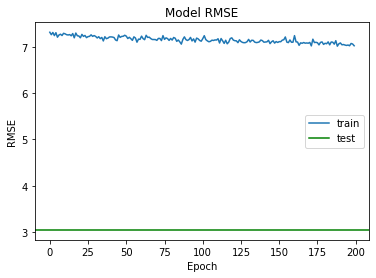

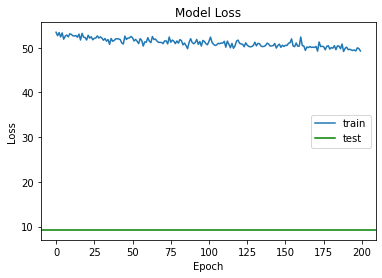

In [12]:
plt.plot(best_history.history['root_mean_squared_error'], label='train')
plt.axhline(test_rmse, color='g', label='test')
plt.title('Model RMSE')
plt.ylabel('RMSE')
plt.xlabel('Epoch')
plt.legend()
fpath = os.path.join("plots", now + " Model RMSE vs Epoch for predicting turbidity" + ".png")
if check_file(fpath):
    print("Could not save: {0}\nPossibly change datetime".format(fpath))
else:
    plt.savefig(fpath)
plt.show()

plt.plot(best_history.history['loss'], label='train')
plt.axhline(test_loss, color='g', label='test')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
fpath = os.path.join("plots", now + " Model Loss vs Epoch for predicting turbidity" + ".png")
if check_file(fpath):
    print("Could not save: {0}\nPossibly change datetime".format(fpath))
else:
    plt.savefig(fpath)
plt.show()

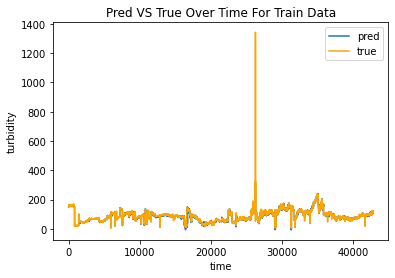

In [13]:
pred = best_model.predict(x_shaped)

plt.plot(pred, label='pred')
plt.plot(y_shaped, color='orange', label='true')
plt.title('Pred VS True Over Time For Train Data')
plt.ylabel('turbidity')
plt.xlabel('time')
plt.legend()
fpath = os.path.join("plots", now + " Overall Acc Predicted and True vs Time for predicting turbidity" + ".png")
if check_file(fpath):
    print("Could not save: {0}\nPossibly change datetime".format(fpath))
else:
    plt.savefig(fpath)
plt.show()
